# <center>AI SATURDAYS DONOSTIA 2020<center>
## <center>Proyecto Práctico Equipo "FACEMOOD"</center>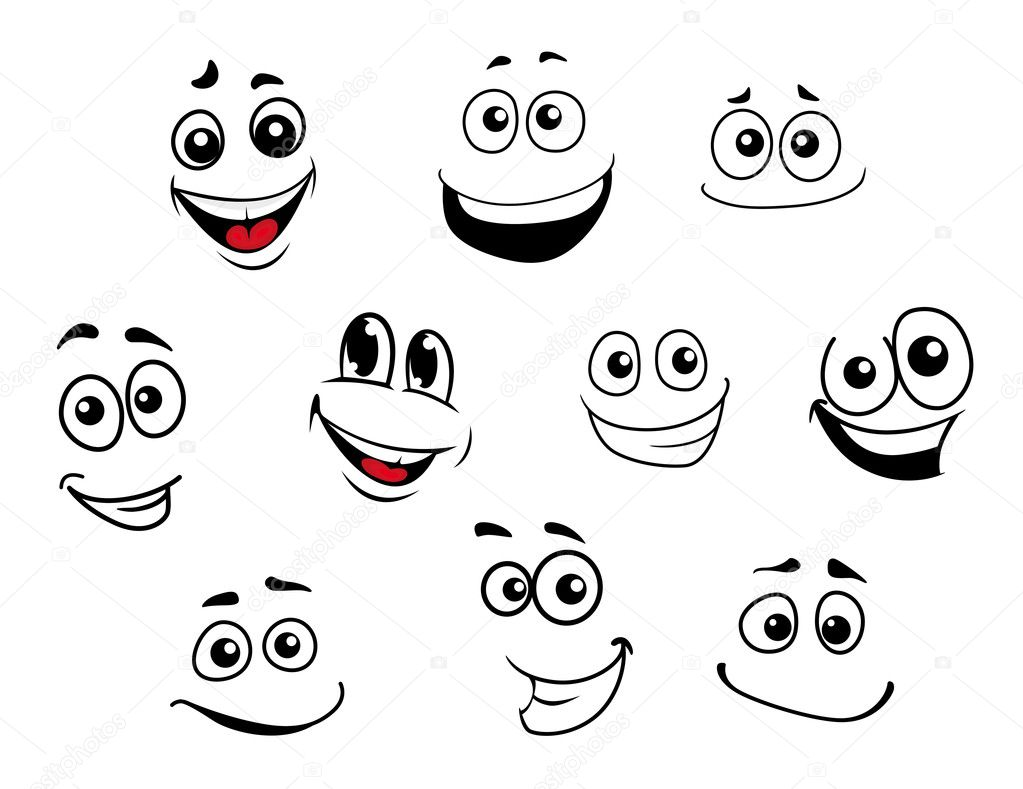

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from main_functions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Conjunto de Datos

In [263]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

Participant        Date      Day      Time     Session.Name  \
1       115091  2017-05-02  Tuesday  10:00:06  Daily questions   
2       115091  2017-05-02  Tuesday  12:02:48  Daily questions   
3       115091  2017-05-02  Tuesday  14:03:02  Daily questions   
4       115091  2017-05-02  Tuesday  16:34:28  Daily questions   
6       115091  2017-05-02  Tuesday  20:02:12  Daily questions   

   Notification.No  LifePak.Download.No  Responded  Completed.Session  \
1                1                    1          1                  1   
2                2                    1          1                  1   
3                3                    1          1                  1   
4                4                    1          1                  1   
6                6                    1          1                  1   

   Session.Instance Session.Instance.Response.Lapse  Reminders.Delivered  \
1               1.0                        00:00:06                    0   
2               2.0                        00:02:48                    0   
3               3.0                        00:03:02                    0   
4               4.0                        00:34:28                    0   
6               5.0                        00:02:12                    0   

   Fatigue  LowMood  Loneliness  Concentrat  LossOfInt  Inferior  Hopeless  \
1     61.0     55.0        61.0        64.0       68.0      50.0      56.0   
2     28.0     59.0        57.0        70.0       58.0      37.0      56.0   
3     24.0     20.0        44.0        70.0       67.0      26.0      38.0   
4     63.0     25.0        56.0        79.0       89.0      30.0      20.0   
6     16.0     22.0         0.0        27.0       83.0      15.0       3.0   

   Stress  PSMU  News  ASMU  
1    73.0  66.0  39.0  38.0  
2    67.0   0.0  27.0  23.0  
3    39.0  63.0  34.0  36.0  
4    60.0  67.0  29.0  23.0  
6    25.0  16.0   0.0   0.0

### Las 11 variables estudiadas (8 relacionadas a "depresión" y 3 relacionadas al uso de "Redes Sociales")

In [264]:
df2 = df.iloc[:,12:]
df2.head()

Fatigue  LowMood  Loneliness  Concentrat  LossOfInt  Inferior  Hopeless  \
1     61.0     55.0        61.0        64.0       68.0      50.0      56.0   
2     28.0     59.0        57.0        70.0       58.0      37.0      56.0   
3     24.0     20.0        44.0        70.0       67.0      26.0      38.0   
4     63.0     25.0        56.0        79.0       89.0      30.0      20.0   
6     16.0     22.0         0.0        27.0       83.0      15.0       3.0   

   Stress  PSMU  News  ASMU  
1    73.0  66.0  39.0  38.0  
2    67.0   0.0  27.0  23.0  
3    39.0  63.0  34.0  36.0  
4    60.0  67.0  29.0  23.0  
6    25.0  16.0   0.0   0.0

### Estadísticas básicas de las 11 variables

In [265]:
df2.describe()

Fatigue      LowMood   Loneliness   Concentrat    LossOfInt  \
count  8652.000000  8647.000000  8646.000000  8643.000000  8646.000000   
mean     36.987171    13.150919    11.971085    26.389795    25.501619   
std      29.717460    18.278325    16.962882    26.086166    26.272407   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      10.000000     0.000000     0.000000     2.000000     0.000000   
50%      30.000000     6.000000     5.000000    19.000000    18.000000   
75%      64.000000    20.000000    18.000000    45.000000    40.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

          Inferior     Hopeless       Stress         PSMU         News  \
count  8646.000000  8649.000000  8648.000000  8644.000000  8647.000000   
mean     10.583854    12.023124    20.639801    31.604350    20.804788   
std      15.485521    16.733406    23.184786    29.214782    24.890481   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     5.000000    14.000000    24.000000    12.000000   
75%      17.000000    19.000000    30.000000    61.000000    31.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

              ASMU  
count  8645.000000  
mean     21.410642  
std      25.321793  
min       0.000000  
25%       0.000000  
50%      12.000000  
75%      33.000000  
max     100.000000

### Gráficas de Dispersión en formato de Diagrama de Matriz de las 11 Variables

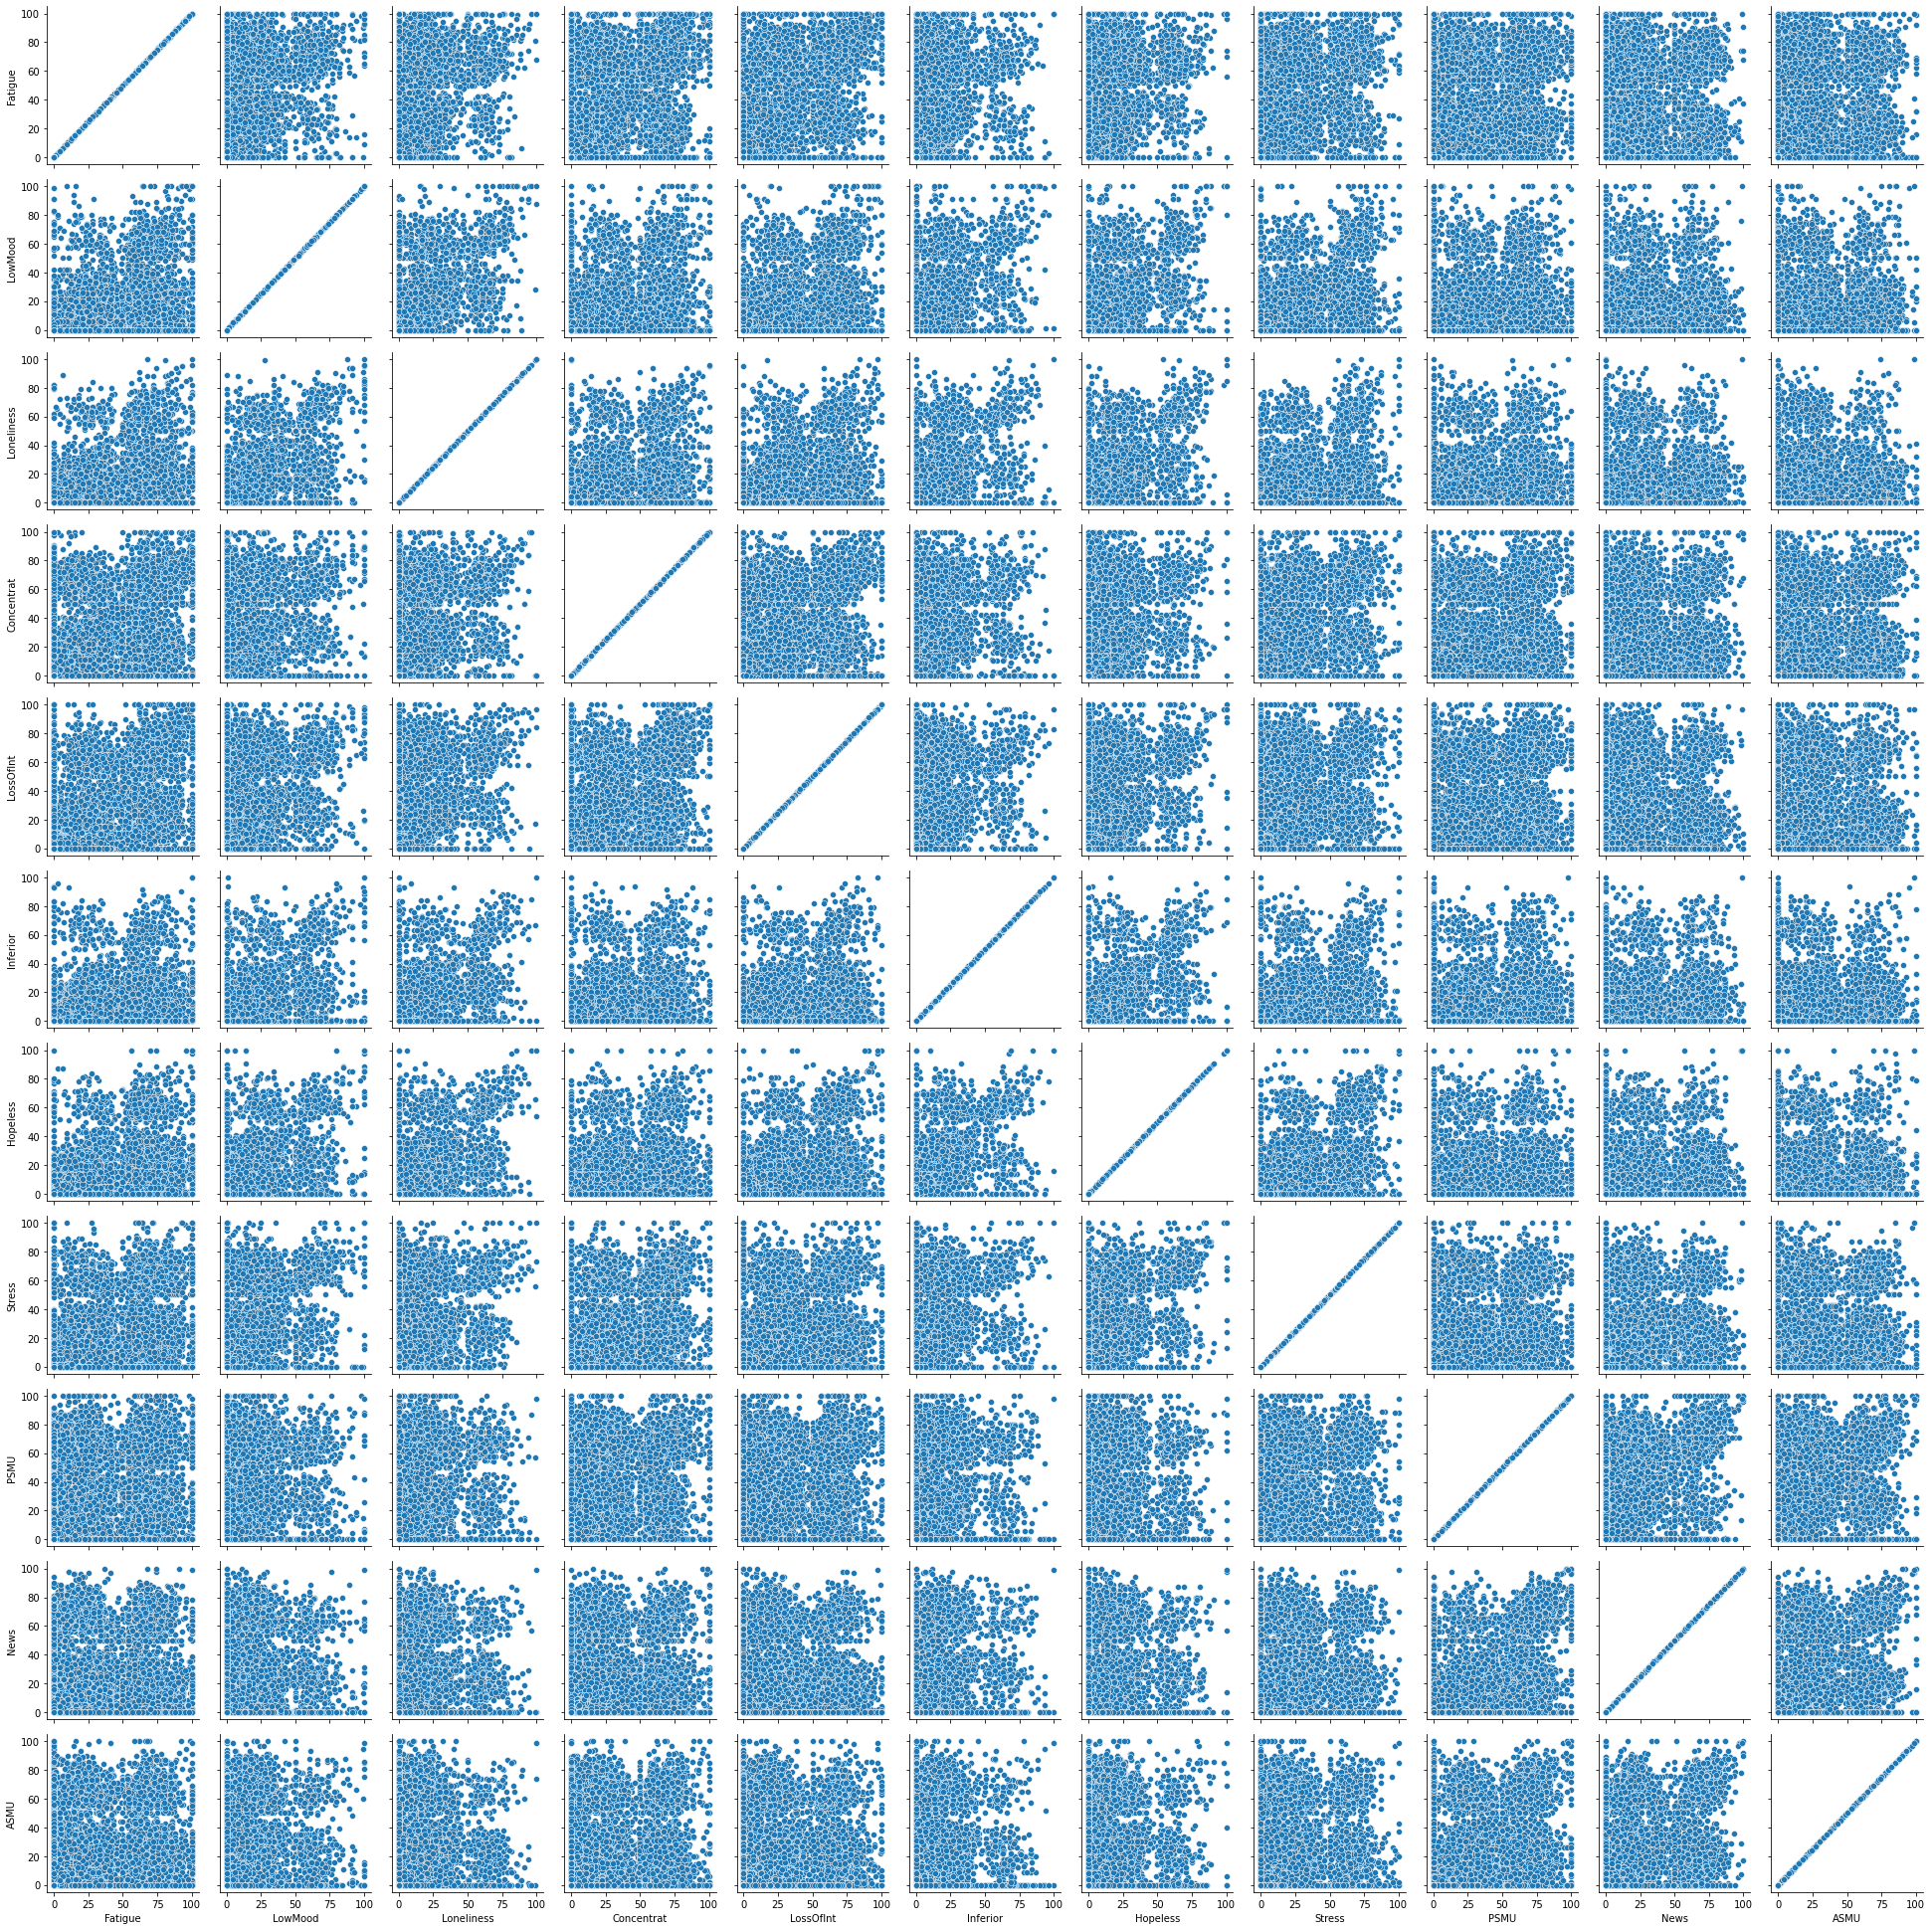

In [266]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)

### Medianas por participante

In [267]:
dfmedian=df.groupby('Participant').median()
dfmedian=dfmedian.iloc[:,6:]

### Estadísticas descriptivas de las Medianas por participante

In [268]:
dfmedian.describe()

Fatigue     LowMood  Loneliness  Concentrat   LossOfInt    Inferior  \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean    35.012000    9.120000    8.804000   20.460000   19.576000    7.948000   
std     23.915886   10.721624   10.533911   17.560563   17.982749   10.314769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     15.000000    0.000000    0.000000    4.500000    2.000000    0.000000   
50%     31.000000    6.000000    6.000000   19.000000   18.000000    2.000000   
75%     58.000000   17.000000   16.000000   28.000000   28.000000   14.000000   
max     83.000000   55.000000   55.000000   73.000000   72.000000   54.000000   

         Hopeless      Stress       PSMU        News        ASMU  
count  125.000000  125.000000  125.00000  125.000000  125.000000  
mean     8.624000   16.052000   27.94400   15.816000   17.008000  
std     10.853804   16.152227   22.67381   18.610561   19.320825  
min      0.000000    0.000000    0.00000    0.000000    0.000000  
25%      0.000000    0.000000   10.50000    0.000000    0.000000  
50%      3.000000   14.000000   23.50000   11.000000   13.500000  
75%     15.000000   23.000000   43.50000   22.000000   24.500000  
max     54.000000   64.000000   77.00000   76.000000   79.500000

### Diagrama de Matriz para las Medianas de las 11 Variables

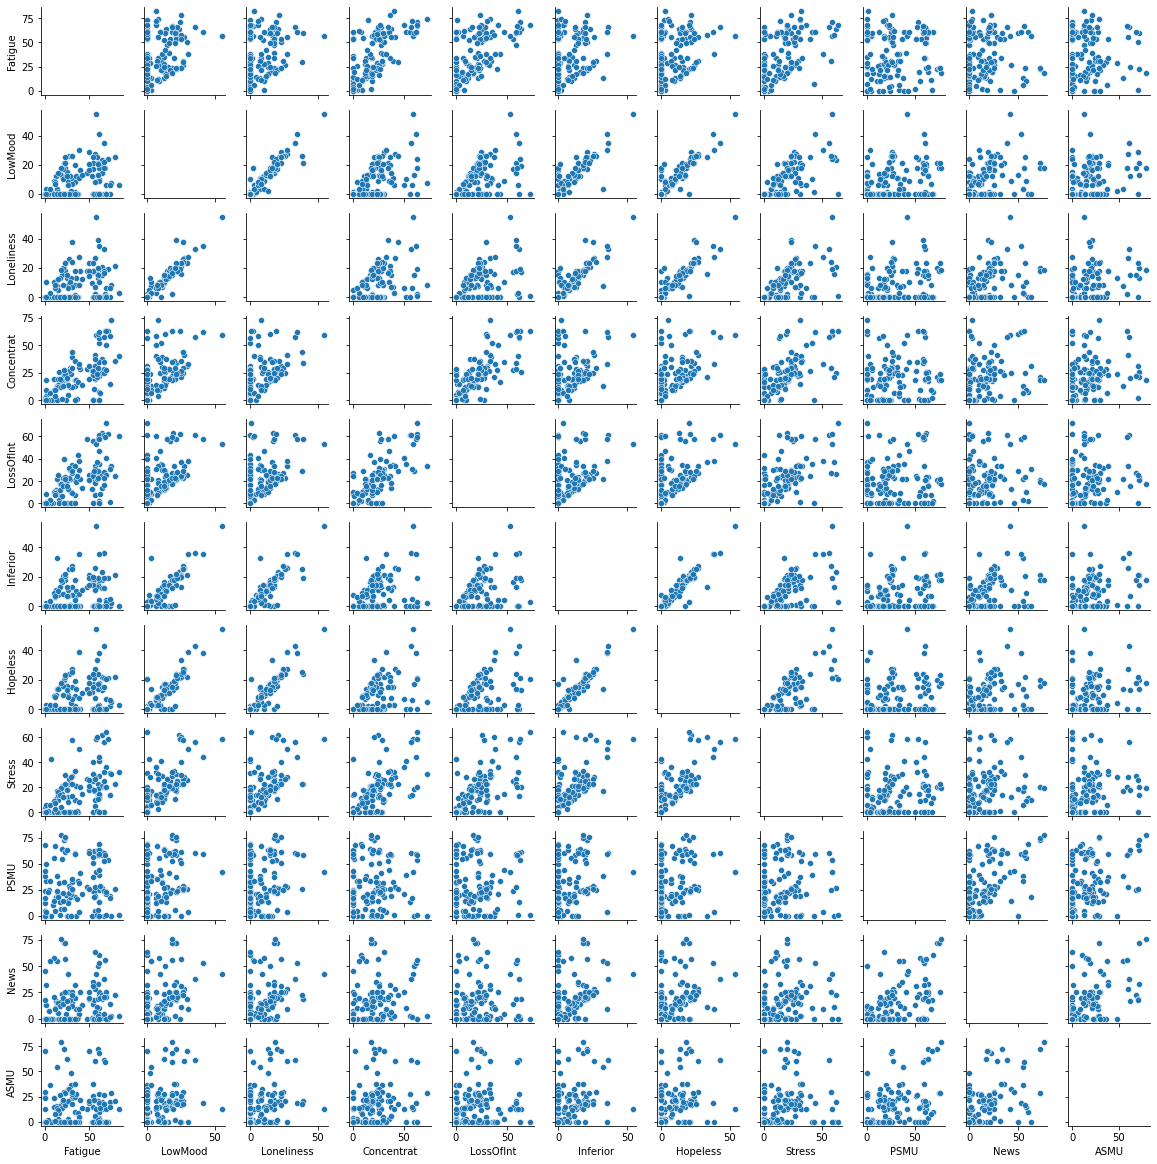

In [269]:
#g = sns.PairGrid(dfmedian, height=1.5)
#g.map_offdiag(sns.scatterplot)
#g.map_offdiag(sns.regplot)
#g.map_diag(plt.hist)
printMatrixDiagram(dfmedian)
#Decirle a Henry: En github sale mas información de la gráfica

### Correlaciones de Pearson para las Medianas de las 11 Variables

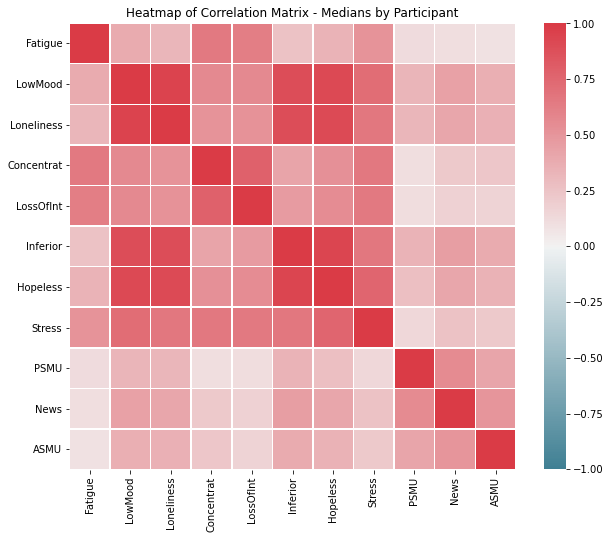

             Fatigue   LowMood  Loneliness  Concentrat  LossOfInt  Inferior  \
Fatigue     1.000000  0.388624    0.322274    0.655198   0.626204  0.259637   
LowMood     0.388624  1.000000    0.949128    0.563623   0.566066  0.897216   
Loneliness  0.322274  0.949128    1.000000    0.511942   0.522927  0.897224   
Concentrat  0.655198  0.563623    0.511942    1.000000   0.782571  0.429409   
LossOfInt   0.626204  0.566066    0.522927    0.782571   1.000000  0.475468   
Inferior    0.259637  0.897216    0.897224    0.429409   0.475468  1.000000   
Hopeless    0.340497  0.921116    0.910543    0.524931   0.549720  0.938407   
Stress      0.508896  0.725804    0.664148    0.660198   0.655638  0.668883   
PSMU        0.120300  0.333257    0.325784    0.104106   0.115973  0.342550   
News        0.103161  0.438256    0.410461    0.220152   0.176854  0.456311   
ASMU        0.086841  0.360601    0.352487    0.235048   0.169266  0.388539   

            Hopeless    Stress      PSMU      News 

In [270]:
printPearsonCorrelations(dfmedian)

### Se observan correlaciones más significativas entre las siguientes variables:
LowMood vs Loneliness

LowMood vs Inferior

LowMood vs Hopeless

LowMood vs Stress

Loneliness vs Inferior (89,7%)

Loneliness vs Hopeless (91,1%)

Concentrat vs LossOfInt 

Inferior vs Hopeless (93,8%)

Hopeless vs Stress

### Regresión Lineal para las Medianas: y = DeprMood, X = Demás Variables

In [271]:
dfmedian=df.groupby('Participant').median()
dfmedian=dfmedian.iloc[:,6:]
# Split the 'features' and 'income' data into training and testing sets
label = dfmedian.LowMood

dfmedian.drop('LowMood', axis=1, inplace=True)

dfmedian.drop('Inferior', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)
dfmedian.drop('Hopeless', axis=1, inplace=True)       # Muy correlacionado con Loneliness (>90%)

In [272]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})
calculateRegression(dfmedian,label,resultsummary)

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0     -1.267          2.704         4.204        0.936       0.848   
1        1.0     -1.041          2.718         4.157        0.935       0.851   
2        2.0     -1.040          2.719         4.139        0.935       0.853   
3        3.0     -0.675          2.744         4.150        0.934       0.852   
4        4.0     -0.822          2.758         4.041        0.933       0.859   
5        5.0     -0.523          2.805         4.144        0.931       0.852   

   p_value_max removed_var  
0        0.866        PSMU  
1        0.786  Concentrat  
2        0.651     Fatigue  
3        0.146        ASMU  
4        0.212        News  
5        0.068           -  

[0.88876035 0.04602871 0.06911447] -0.5232605721393195


### Modelo Final Medianas

### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medianas" es alto (85,2%), indicando que el ajuste puede ser considerado aceptable bajo un punto de vista estadístico.
### LowMood = -0,52 + 0,89 Loneliness + 0,05 LossOfInt + 0,07 Stress

###    

### Medias por participante

In [273]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfmean)
print(dfmean.shape)

               Fatigue    LowMood  Loneliness  Concentrat  LossOfInt  \
Participant                                                            
115091       45.155844  20.454545   23.285714   37.272727  47.675325   
131183       36.288136   3.474576    0.389831   19.508475  14.508475   
438907       51.040816  26.285714   21.833333   35.729167  50.979592   
515070       34.865385  12.692308   14.076923   32.903846  16.038462   
572172       18.272727  10.738636    9.375000   14.352273  25.761364   
680605       60.894737  14.915789    3.663158   46.852632  37.473684   
696084       46.555556  12.083333   13.263889   35.333333  34.083333   
697356        3.870370   1.259259    0.240741    1.814815   0.833333   
857523       31.365591  21.419355   20.645161   24.677419  23.741935   
883656       32.325843  17.696629   18.887640   21.370787  24.820225   
1102830      28.957447   3.382979    1.702128   22.702128  21.106383   
1156365      15.303371  11.460674   11.213483   12.741573  12.28

### Estadísticas descriptivas de las Medias por participante

In [274]:
dfmean.describe()

Fatigue     LowMood  Loneliness  Concentrat   LossOfInt    Inferior  \
count  125.000000  125.000000  125.000000  125.000000  125.000000  125.000000   
mean    37.066547   13.015210   11.900892   26.568285   25.175316   10.360674   
std     17.373640   11.226345   11.066729   14.376593   14.705502   10.527341   
min      0.802469    0.000000    0.000000    0.474359    0.407407    0.000000   
25%     24.202532    3.227848    2.176471   15.574713   13.000000    1.319149   
50%     38.150000   11.185185    9.140625   25.810127   24.543478    6.448276   
75%     49.244186   21.173913   19.063492   35.333333   34.872340   17.231884   
max     78.378947   54.141176   53.788235   70.562500   70.224138   52.658824   

         Hopeless      Stress        PSMU        News        ASMU  
count  125.000000  125.000000  125.000000  125.000000  125.000000  
mean    11.852346   20.555942   31.265974   20.329226   21.265517  
std     10.889494   14.524215   14.071410   15.665447   15.387645  
min      0.000000    0.180556    3.342857    0.308642    0.314815  
25%      2.945946    8.222222   21.041667    6.705882    9.189189  
50%      8.690909   19.634921   30.159420   16.566265   20.867647  
75%     18.049383   32.277108   38.915493   31.017241   28.971831  
max     52.952941   61.482353   75.413043   72.393939   77.863636

### Diagrama de Matriz para las Medias de las 11 Variables

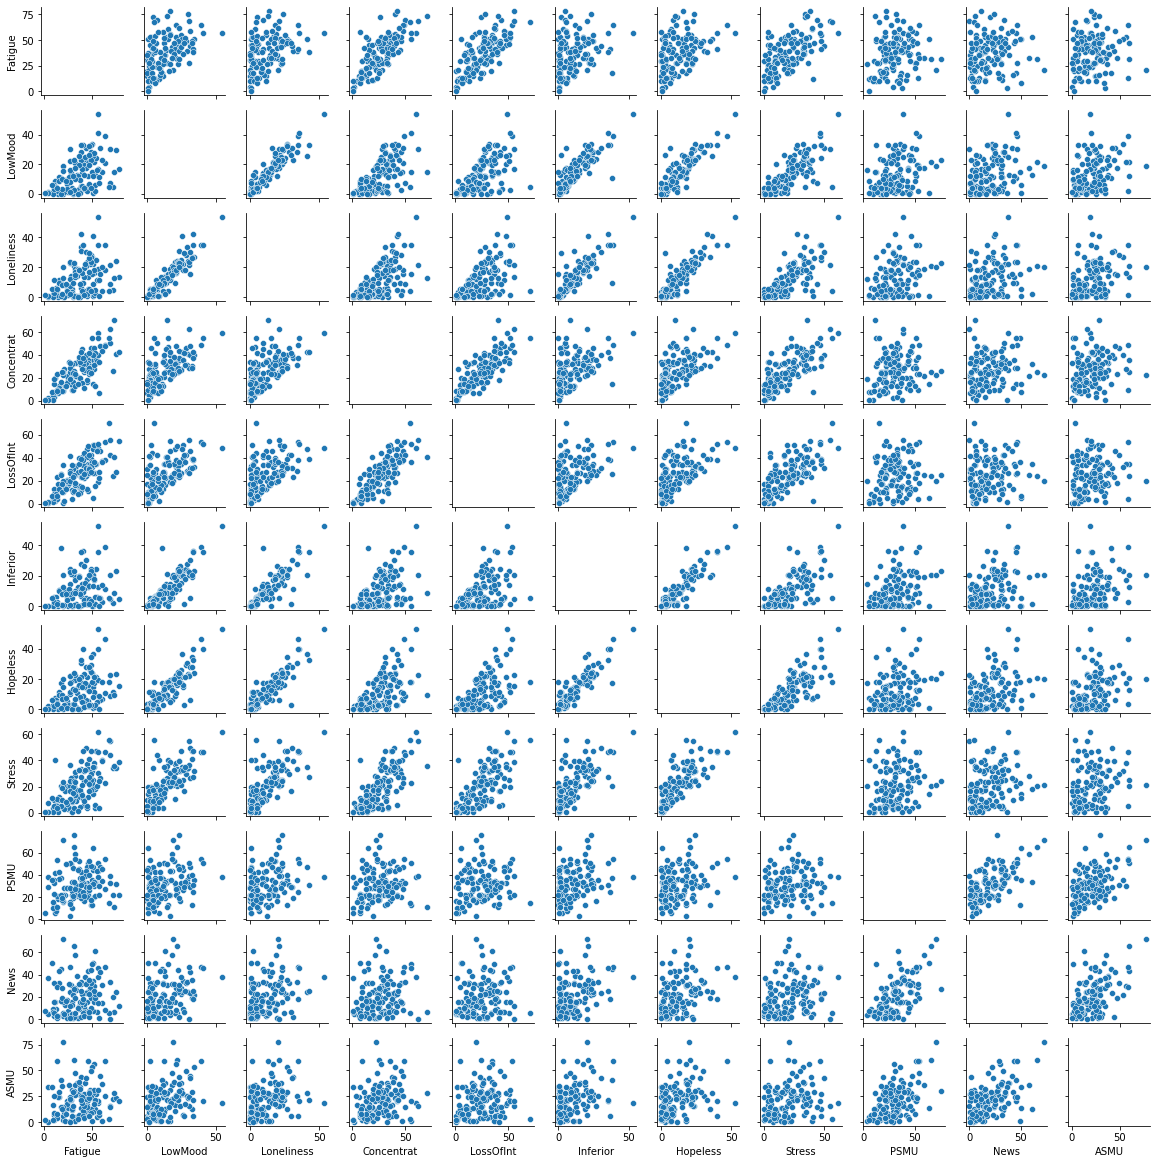

In [275]:
#g = sns.PairGrid(dfmean, height=1.5)
#g.map_offdiag(sns.scatterplot)
#g.map_offdiag(sns.regplot)
#g.map_diag(plt.hist)
printMatrixDiagram(dfmean)

### Diferencias entre Medias y Medianas

C:\Users\Sergio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: distplot() got an unexpected keyword argument 'y'

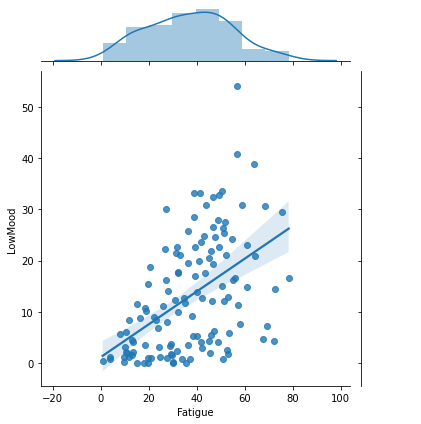

In [276]:
gridA = sns.JointGrid(x="Fatigue", y="LowMood", data=dfmean, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

In [ ]:
dfmedian=df.groupby('Participant').median()
gridA = sns.JointGrid(x="Fatigue", y="LowMood", data=dfmedian, height=6)
gridA=gridA.plot_joint(sns.regplot)
gridA = gridA.plot_marginals(sns.distplot)

### Correlaciones de Pearson para las Medias de las 11 Variables

In [ ]:
printPearsonCorrelations(dfmean)

### Se observan correlaciones más significativas entre las siguientes variables:

Fatigue vs Concentrat

Fatigue vs LossOfInt

LowMood vs Loneliness

LowMood vs Inferior

LowMood vs Hopeless

LowMood vs Stress

Loneliness vs Inferior

Loneliness vs Hopeless (90,3%)

Loneliness vs Stress

Concentrat vs LossOfInt 

Inferior vs Hopeless (90,7%)

Hopeless vs Stress

### Regresión Lineal para las Medias: y = DeprMood, X = Demás Variables

In [286]:
dfmean=df.groupby('Participant').mean()
dfmean=dfmean.iloc[:,6:]

# Split the 'features' and 'income' data into training and testing sets
label = dfmean.LowMood
dfmean.drop('LowMood', axis=1, inplace=True)
dfmean.drop('Hopeless', axis=1, inplace=True)        # Muy correlacionado con Loneliness & Inferior (>90%)

In [287]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})
calculateRegression(dfmean,label,resultsummary)

iteration
0
Fatigue       5.268180e-01
Loneliness    1.476910e-17
Concentrat    8.776180e-01
LossOfInt     7.366578e-01
Inferior      2.110498e-01
Stress        1.431890e-02
PSMU          6.768209e-01
News          1.379274e-01
ASMU          2.333569e-01
Name: P>|t|, dtype: float64
iteration
1.0
Fatigue       4.083537e-01
Loneliness    8.151555e-18
LossOfInt     6.462287e-01
Inferior      2.077746e-01
Stress        1.056290e-02
PSMU          6.711294e-01
News          1.362926e-01
ASMU          2.299890e-01
Name: P>|t|, dtype: float64
iteration
2.0
Fatigue       4.724278e-01
Loneliness    5.598295e-18
LossOfInt     6.277810e-01
Inferior      2.128941e-01
Stress        8.284344e-03
News          1.374526e-01
ASMU          1.496468e-01
Name: P>|t|, dtype: float64
iteration
3.0
Fatigue       1.660846e-01
Loneliness    3.921666e-18
Inferior      1.886879e-01
Stress        4.329571e-03
News          1.481560e-01
ASMU          1.516965e-01
Name: P>|t|, dtype: float64
iteration
4.0
Fatigue   

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting

print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

In [ ]:
# Evaluación del Error Medio del primer ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_train) - y_train)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

In [ ]:
# R2 del primer ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.3f}'.format(reg.score(X_train, y_train)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.3f}'.format(reg.score(X_test, y_test)))

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [ ]:
# Eliminación de 3 variables con alto p-value (> 0,6)

dfmean.drop('Concentrat', axis=1, inplace=True)
dfmean.drop('LossOfInt', axis=1, inplace=True)
dfmean.drop('PSMU', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [ ]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

In [ ]:
# Eliminación de 2 variables con alto p-value (> 0,16)

dfmean.drop('Fatigue', axis=1, inplace=True)
dfmean.drop('Inferior', axis=1, inplace=True)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

In [ ]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

In [ ]:
# Eliminación de 1 variable con alto p-value (> 0,19)

dfmean.drop('ASMU', axis=1, inplace=True)
# print(dfmean)

data_train, data_test, label_train, label_test = train_test_split(dfmean, label, test_size = 0.2, random_state = 50)

X_train = data_train
y_train = label_train

X_test=data_test
y_test=label_test

# print(X_train)
# print(y_train)

### Modelo Final Medias

In [ ]:
reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train, label_train)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train,data_train)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

### Análisis de Residuos Modelo Final

In [ ]:
#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

In [ ]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

In [ ]:
!pip install scipy
from scipy import stats

plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Se observan 2 outliers en el análisis de residuos del modelo final.

### Próximos pasos: Eliminar estos 2 outliers del conjunto de datos y volver a ajustar el modelo final.

In [ ]:
# Identificación residuos "outlier"

predictions = result.predict(data_train)
residuals = y_train - predictions
residuals

# Índices de los residuos "outlier"
indexNames = residuals[ standardized_residuals > 3 ].index
print(indexNames)
firstoutlier=indexNames[0]
secondoutlier=indexNames[1]
print("Index Primer Outlier: {}".format(firstoutlier))
print("Index Segun Outlier: {}".format(secondoutlier))

In [ ]:
# Borrar estos índices del conjunto de datos
data_train_withoutoutliers = data_train.drop([firstoutlier, secondoutlier]) 
label_train_withoutoutliers = label_train.drop([firstoutlier, secondoutlier])

In [ ]:
# Volver a ajustar el Modelo Final sin Outliers

reg = LinearRegression() # Create the Linear Regression estimator
result=reg.fit (data_train_withoutoutliers, label_train_withoutoutliers)  # Perform the fitting
print('Coeff and intercept: {} {}'.format(reg.coef_, reg.intercept_))

# P-values para decidir qué variables x son importantes para explicar y
import statsmodels.api as sm
mod = sm.OLS(label_train_withoutoutliers, data_train_withoutoutliers)
fitt = mod.fit()
p_values = fitt.summary2().tables[1]['P>|t|']
print(p_values)

#create instance of influence
influence = fitt.get_influence()

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

# print(fitt.summary())
# print(fitt.predict())
# print(standardized_residuals)

plt.scatter(fitt.predict(), standardized_residuals)
plt.xlabel('Prediccion', fontsize=12)
plt.ylabel('Residuo estandarizado', fontsize=12)
plt.title('Gráfica de Residuos', fontsize=15)

In [ ]:
plt.hist(standardized_residuals)
plt.xlabel('Standardized Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histograma Residuos Estandarizados', fontsize=15)

In [ ]:
plt.figure(figsize=(7,7))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

### Conclusión del Análisis de Residuos: Tras eliminación de los 2 outliers observados, el Análisis de Residuos puede ser considerado satisfactorio bajo un punto de vista estadístico.

### Evaluación Final Modelo "Medias"

In [ ]:
# Evaluación del Error Medio del último ajuste

print('RMSE of Linear Regression Model with Training Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(data_train_withoutoutliers) - label_train_withoutoutliers)**2))))

print('RMSE of Linear Regression Model with Testing Data: {0:.2f}'.format(np.sqrt(np.mean((reg.predict(X_test) - y_test)**2))))

In [ ]:
# R2 del último ajuste

print('R2 Coefficient for Linear Regression Model with Training Data: {0:.3f}'.format(reg.score(data_train_withoutoutliers, label_train_withoutoutliers)))

print('R2 Coefficient for Linear Regression Model with Testing Data: {0:.3f}'.format(reg.score(X_test, y_test)))

### Conclusión: El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (87,4%). Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.

### LowMood  =  -0,85 + 0,78 Loneliness + 0,18 Stress + 0,04 News